# Calculate the observed amplitudes with data.

Define constants

In [1]:
from math import sqrt, radians, atan2, atan, tan, degrees
from IPython.display import Latex
import numpy as np
font_size=14
import matplotlib.pyplot as plt
import os, sys
sys.path.append('../CommonUtils/')
import CommonUtils as cu


# Physics
c_light=299792458. # m/s 
mMuon = 105.6583745 # MeV 
aMuon= 11659208.9e-10  
h_bar= 1.054571817e-34 # J/s00
MeV_to_kg = 1.79e-30 # MeV -> kg conversion factor 
cm_to_m = 1e-2 # cm -> m conversion factor 


measured_Bz=6.8e-6 # rad 
measured_Bz_e=7.1e-6 # rad 

test = 0.13e-6 

In [2]:
# https://cdcvs.fnal.gov/redmine/projects/gm2geom/repository/revisions/develop/entry/common/Gm2Constants_service.cc
betaGammaMagicSquared = (1.0 / aMuon)
# print("betaGammaMagicSquared", betaGammaMagicSquared)
gammaMagicSquared = (1.0 + betaGammaMagicSquared)
# print("gammaMagicSquared", gammaMagicSquared)
gammaMagic=sqrt(gammaMagicSquared)
print("ɣ"+"={0:.5f}".format(gammaMagic))

# set gamma to gammaMagic
gamma = gammaMagic
gamma_2 = gamma**2

beta= sqrt( 1.0- (1.0/gamma_2) )
print("β"+"={0:.5f}".format(beta))

ɣ=29.30343
β=0.99942


In [3]:
s12=   np.array([6.8,  7.9, -3.5, -0.1])
s12_e= np.array([7.1, 4.5, 5.7, 3.6])
s18=   np.array([-9.5, 10.9, -4.6, 9.8])
s18_e= np.array([7.3, 5.1, 6.0, 4.2])
s1218=(s12+s18)/2
s1218_e=np.sqrt(s12_e**2+s18_e**2)
ds_names=('60h', "9D", "HK", "EG")
ds_colors=["g", "r", "k", "b"]
ds_colors_ex=["orange", "purple", "gray", "cyan"]
ds_markers=["o", "^", "p", "D"]
ds_markers_ex=["P", "v", "X", "h"]

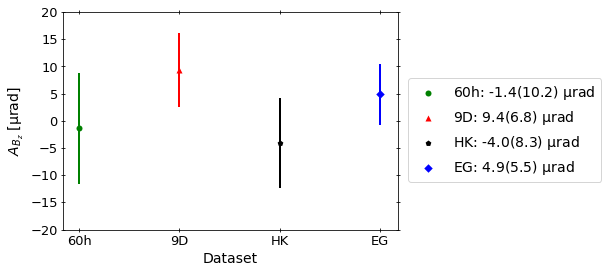

In [4]:
fig, ax = cu.plot_fom(ds_names, s1218, s1218_e, ds_colors, ds_markers)
ax.set_ylim(-20, 20)
fig.savefig("../fig/sum_bz.png", dpi=300, bbox_inches='tight');

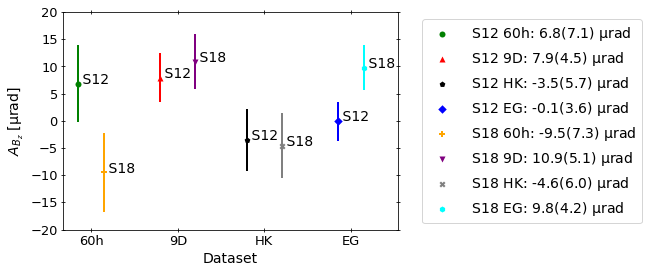

In [5]:
fig, ax = cu.plot_fom(ds_names, s12, s12_e, ds_colors, ds_markers, eL=" S12 ")
fig, ax = cu.plot_fom(ds_names, s18, s18_e, ds_colors_ex, ds_markers_ex, fig=fig, ax=ax, eL=" S18 ")
ax.set_ylim(-20, 20)
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1]+0.2)
ax.legend(fontsize=font_size, loc='upper center', bbox_to_anchor=(1.4, 1.0));
fig.savefig("../fig/s12S18_sum_bz.png", dpi=300, bbox_inches='tight');

In [6]:
def bnl_delta_mrad(amps):
    return np.arctan(np.tan(10*amps)) 

In [7]:
delta_rad=bnl_delta_mrad(s1218*1e-6) 

In [8]:
delta_rad_e=bnl_delta_mrad(s1218_e*1e-6) 

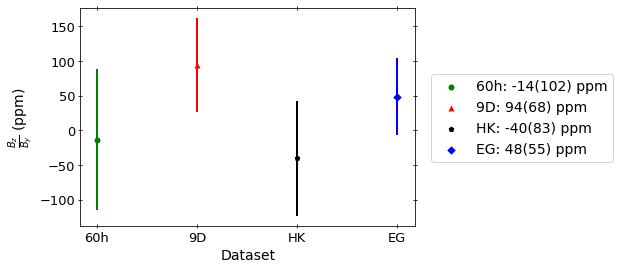

In [9]:
fig, ax = cu.plot_fom(ds_names, delta_rad*1e6, delta_rad_e*1e6, ds_colors, ds_markers, units="ppm", y_label=r"$\frac{B_z}{B_y}$ (ppm)", prec=0)
# ax.set_ylim(-20, 20)
fig.savefig("../fig/ppm_bz.png", dpi=300, bbox_inches='tight');

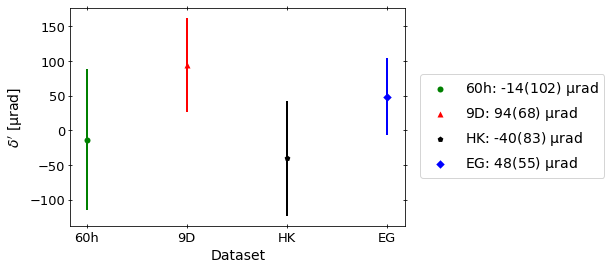

In [10]:
fig, ax = cu.plot_fom(ds_names, delta_rad*1e6, delta_rad_e*1e6, ds_colors, ds_markers,  y_label=r"$\delta '$"+r" [$\rm{\mu}$rad]", prec=0)
# ax.set_ylim(-20, 20)
fig.savefig("../fig/rad_bz.png", dpi=200, bbox_inches='tight');

In [11]:
def get_omega_ppm(delta_rad):
    return 0.5* ( ( (1+aMuon)/(aMuon*gammaMagic) )*delta_rad ) ** 2 * 1e6

In [12]:
omega_ppm = get_omega_ppm(delta_rad)
omega_ppm

array([0.078248229, 3.793697391, 0.704234059, 1.0099281  ])

In [13]:
omega_ppm_e = get_omega_ppm(delta_rad_e)
omega_ppm_e

array([4.452313484, 1.986152573, 2.940587758, 1.313797422])

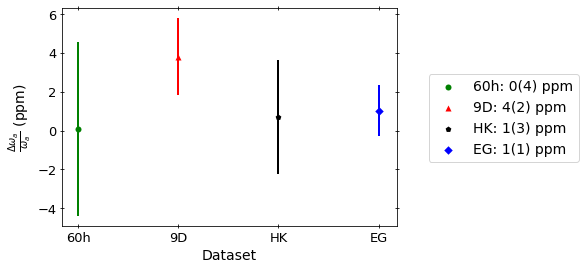

In [14]:
fig, ax = cu.plot_fom(ds_names, omega_ppm, omega_ppm_e, ds_colors, ds_markers, units="ppm", y_label=r"$\frac{\Delta \omega_a}{\omega_a}$ (ppm)", prec=0)
# ax.set_ylim(-20, 20)
fig.savefig("../fig/ppm_omega.png", dpi=300, bbox_inches='tight');

In [15]:
s1218

array([-1.35,  9.4 , -4.05,  4.85])

In [16]:
slope_period=2e-3
slope_bin_width = 66e-3
slope_phase = 29161e-3
slope_lt = 21e-3

error_period=75
error_bin_width=5
error_phase=0.003
error_lt=4

In [20]:
sys_error_urad = [slope_period*error_period, slope_bin_width*error_bin_width, slope_phase*error_phase, slope_lt*error_lt]
print("Errors in urad", sys_error_urad)

Errors in urad [0.15, 0.33, 0.087483, 0.084]


In [40]:
for ds_val, ds_name in zip(s1218, ds_names):
    print("\n DS", ds_name, ds_val)
    ds_choice = abs(ds_val)

    sys_error_partial = sys_error_urad/ds_choice
    print("Partial errors", sys_error_partial)
    sys_partial = np.sqrt(np.sum(sys_error_partial**2))
    print("Quadratue", sys_partial)
    sys_total = sys_partial * ds_choice 
    print("Total sys. urad", sys_total)


 DS 60h -1.35
Partial errors [0.111111111 0.244444444 0.064802222 0.062222222]
Quadratue 0.2831425407375385
Total sys. urad 0.382242429995677

 DS 9D 9.4
Partial errors [0.015957447 0.035106383 0.009306702 0.00893617 ]
Quadratue 0.04066408829741244
Total sys. urad 0.382242429995677

 DS HK -4.05
Partial errors [0.037037037 0.081481481 0.021600741 0.020740741]
Quadratue 0.09438084691251283
Total sys. urad 0.382242429995677

 DS EG 4.8500000000000005
Partial errors [0.030927835 0.068041237 0.018037732 0.017319588]
Quadratue 0.0788128721640571
Total sys. urad 0.3822424299956769
